In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,zscore
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\baseball.csv')

# - Description for Dataset¶


- Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-   Input features:
-    R  - Runs
-    AB - At Bats
-    H  - Hits
-    2B - Doubles
-    3B - Triples
-    HR - Homeruns
-    BB - Walks
-    SO - Strikeouts
-    SB - Stolen Bases
-    RA - Run Allowed
-    ER - Earned Runs
-    ERA - Earned Run Average (ERA)
-    CG - Complete games ( referred online)
 -   SHO - Shutouts
-   SV - Saves
-   E - Errors
  ----------------------------------------------------  
- Output features:
-    W -Number of predicted wins (W)

In [18]:
pd.set_option('display.max_row',None)

In [19]:
df.head()   # Seeing first 5 element 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [20]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [21]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


 • W - Wins
• R - Runs scored
• AB - At bats
• H - Hits by batters
• HR - Homeruns by batters
• BB - Walks by batters
• SO - Strikeouts by batters
• SB - Stolen bases
• RA - Opponents runs scored
• ER - Earned runs allowed
• ERA - Earned run average
• CG - Complete games
• SHO - Shutouts
• SV - Saves
E - Errors

In [22]:
#let's check for Null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [23]:
df.info()  # checking no of rows and columns and their dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Looks like data set have no missing values

# Preprocessing 

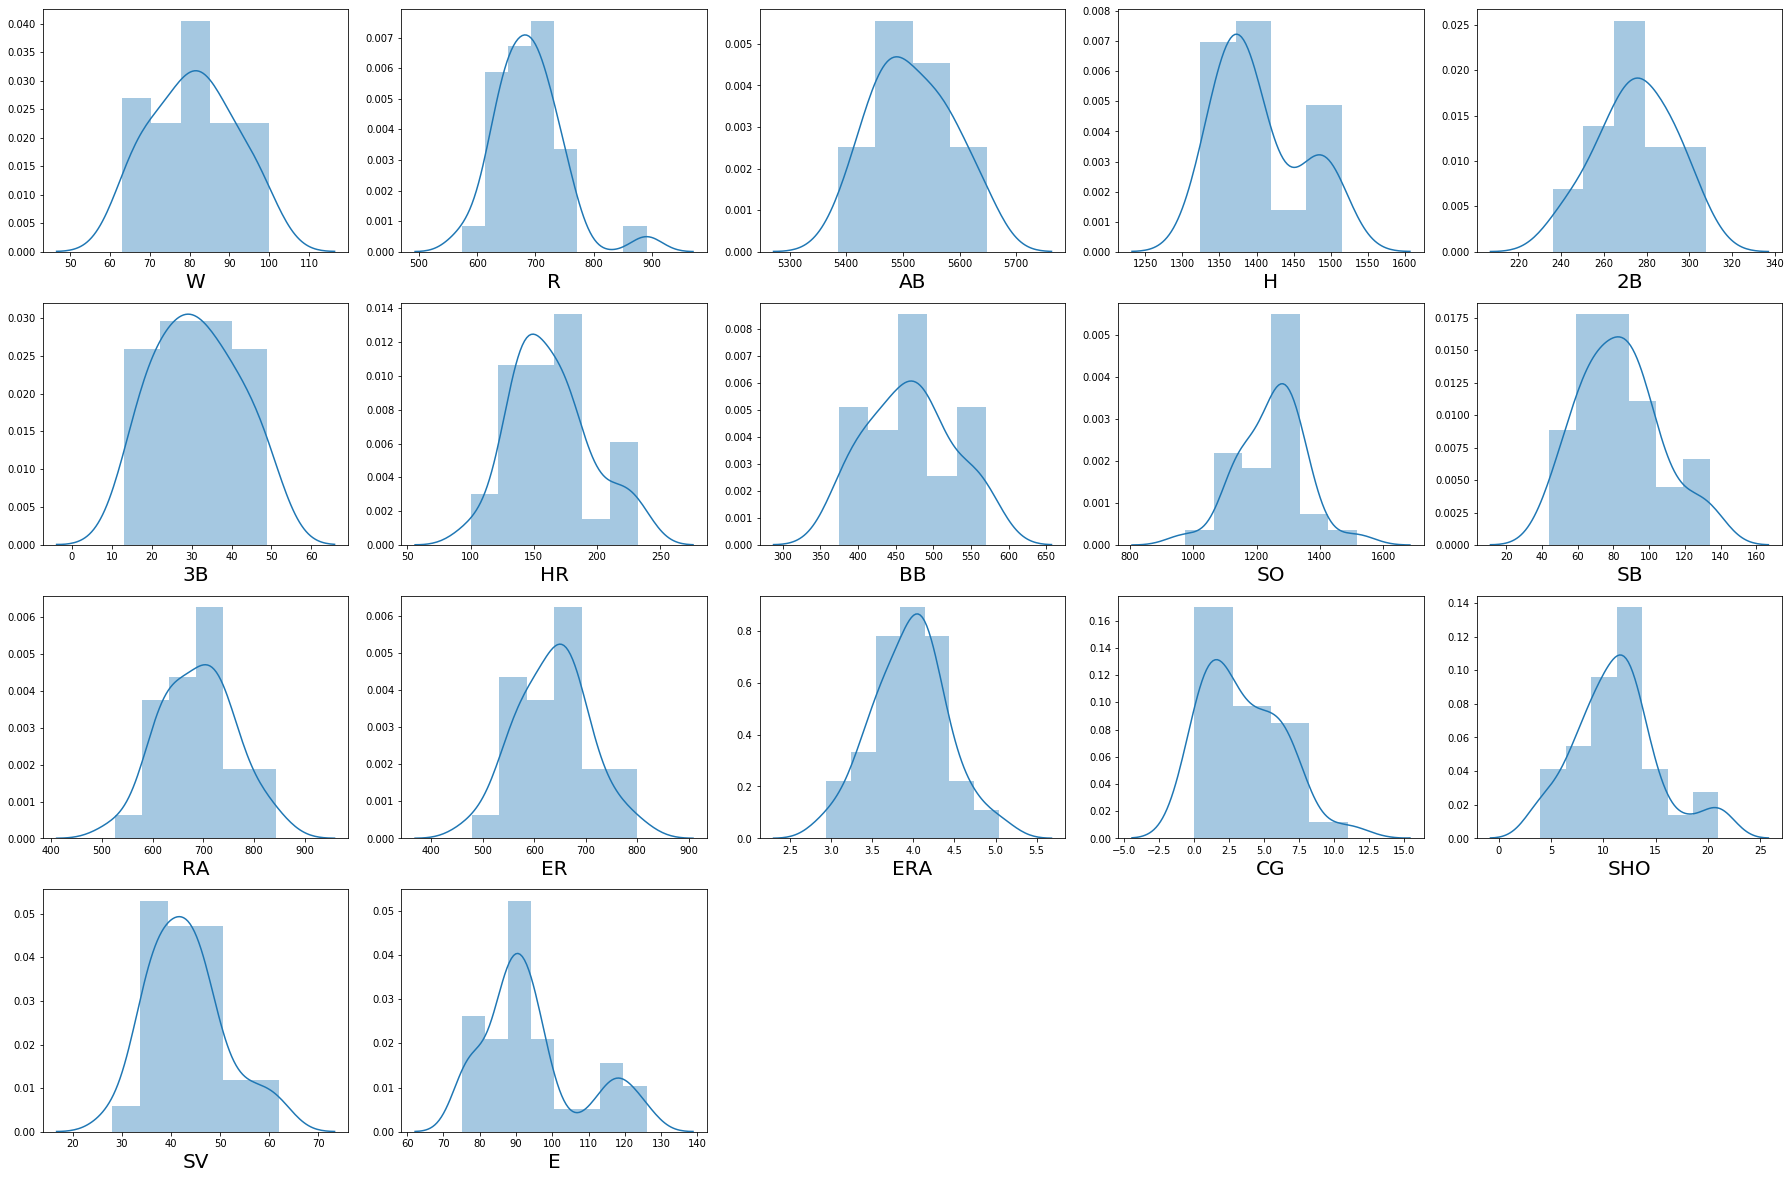

In [24]:
#Let's See how the data is distributed 
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution  we can observe that skewness and outlier in follwing columns H ,CG,SHO,R,E

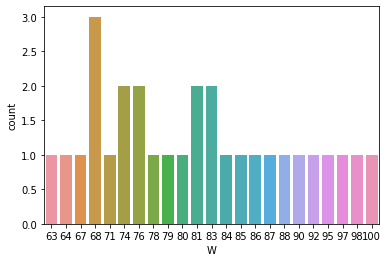

In [116]:
#checking the count in label
sns.countplot(data=df,x='W')

In [25]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Applying log transformation

In [67]:
data['R']=np.log10(data['R'])
data['CG']=np.log10(data['CG'])
data['SHO']=np.log10(data['SHO'])
data['SV']=np.log10(data['SV'])
data['E']=np.log10(data['E'])

In [68]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Z-score

In [75]:
# calculate the zscore to remove the skewness
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print("old shape",df.shape)
print("new shape",df_new.shape)
print("loss of data is  :",((30-29)/30*100),'%')
df=df_new

old shape (30, 17)
new shape (29, 17)
loss of data is  : 3.3333333333333335 %


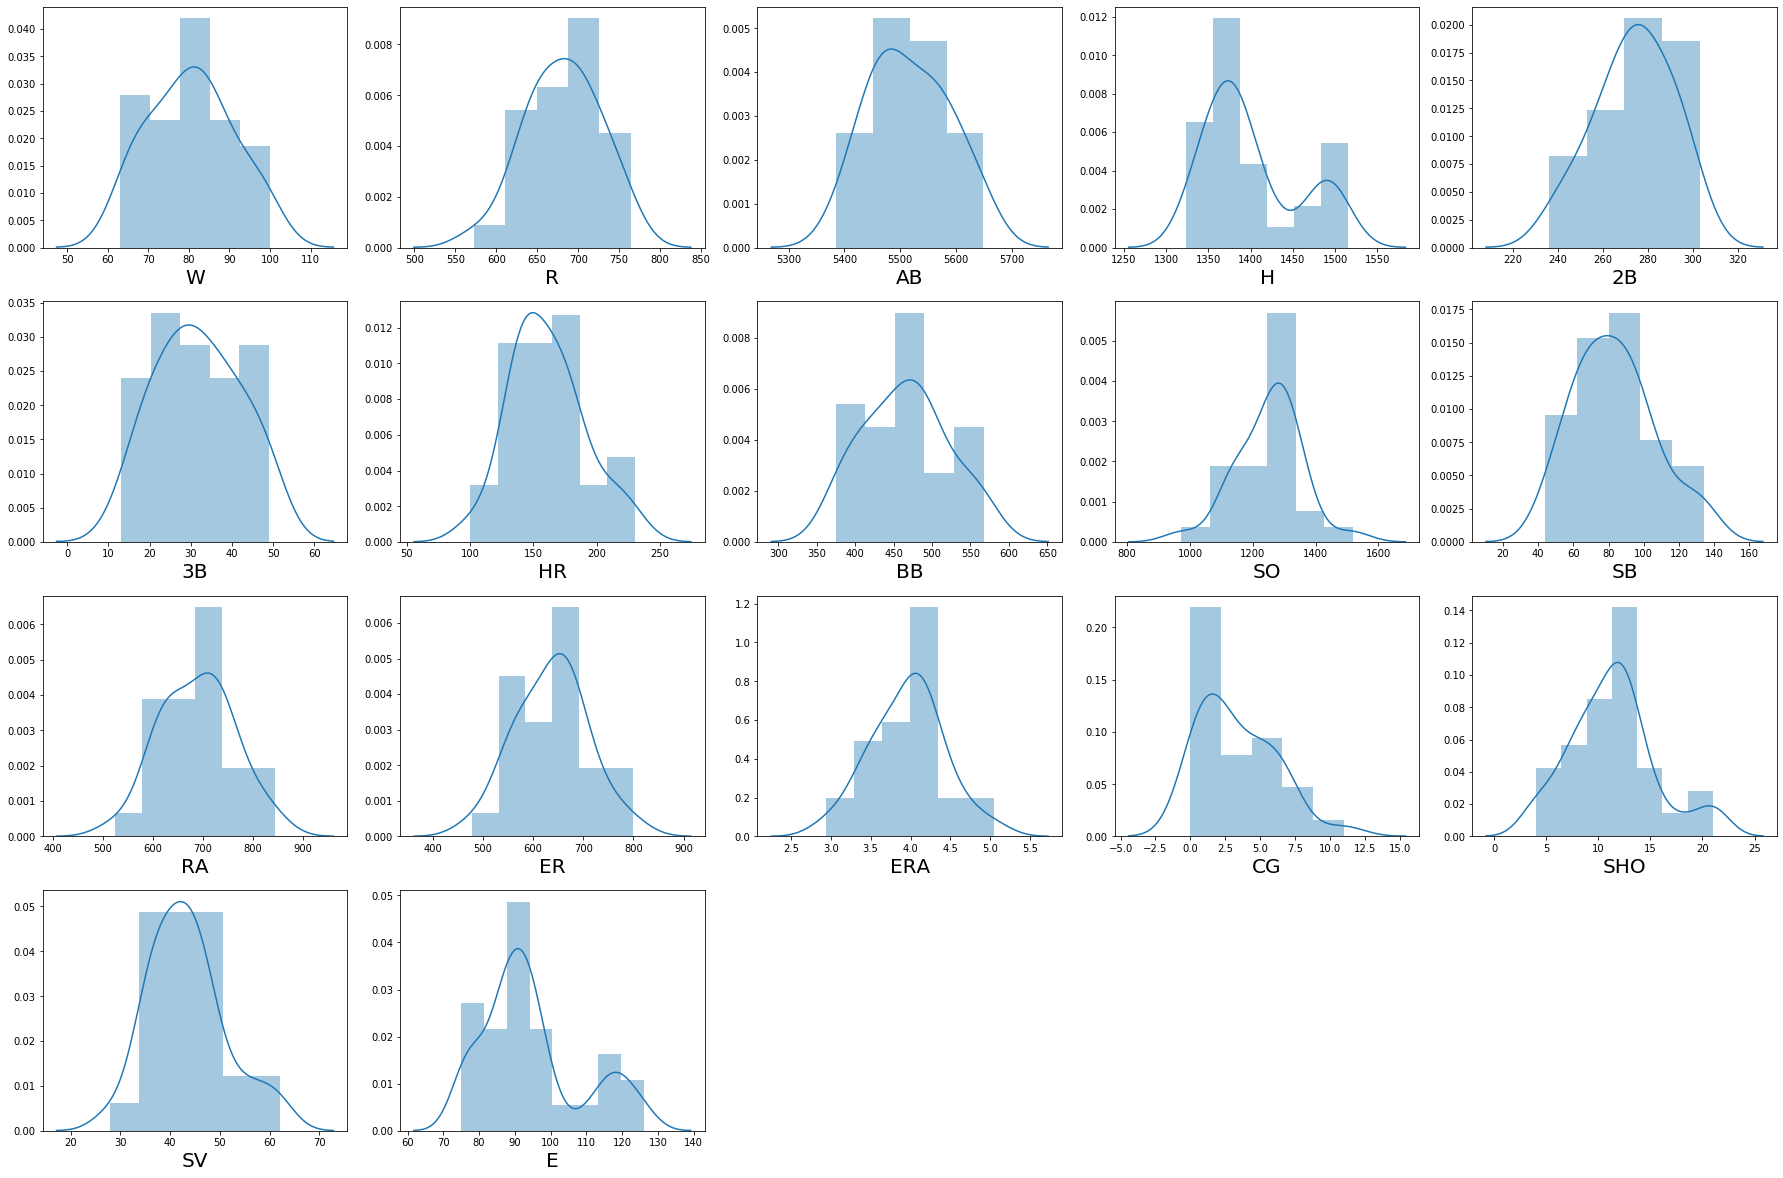

In [76]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

(17.0, 0.0)

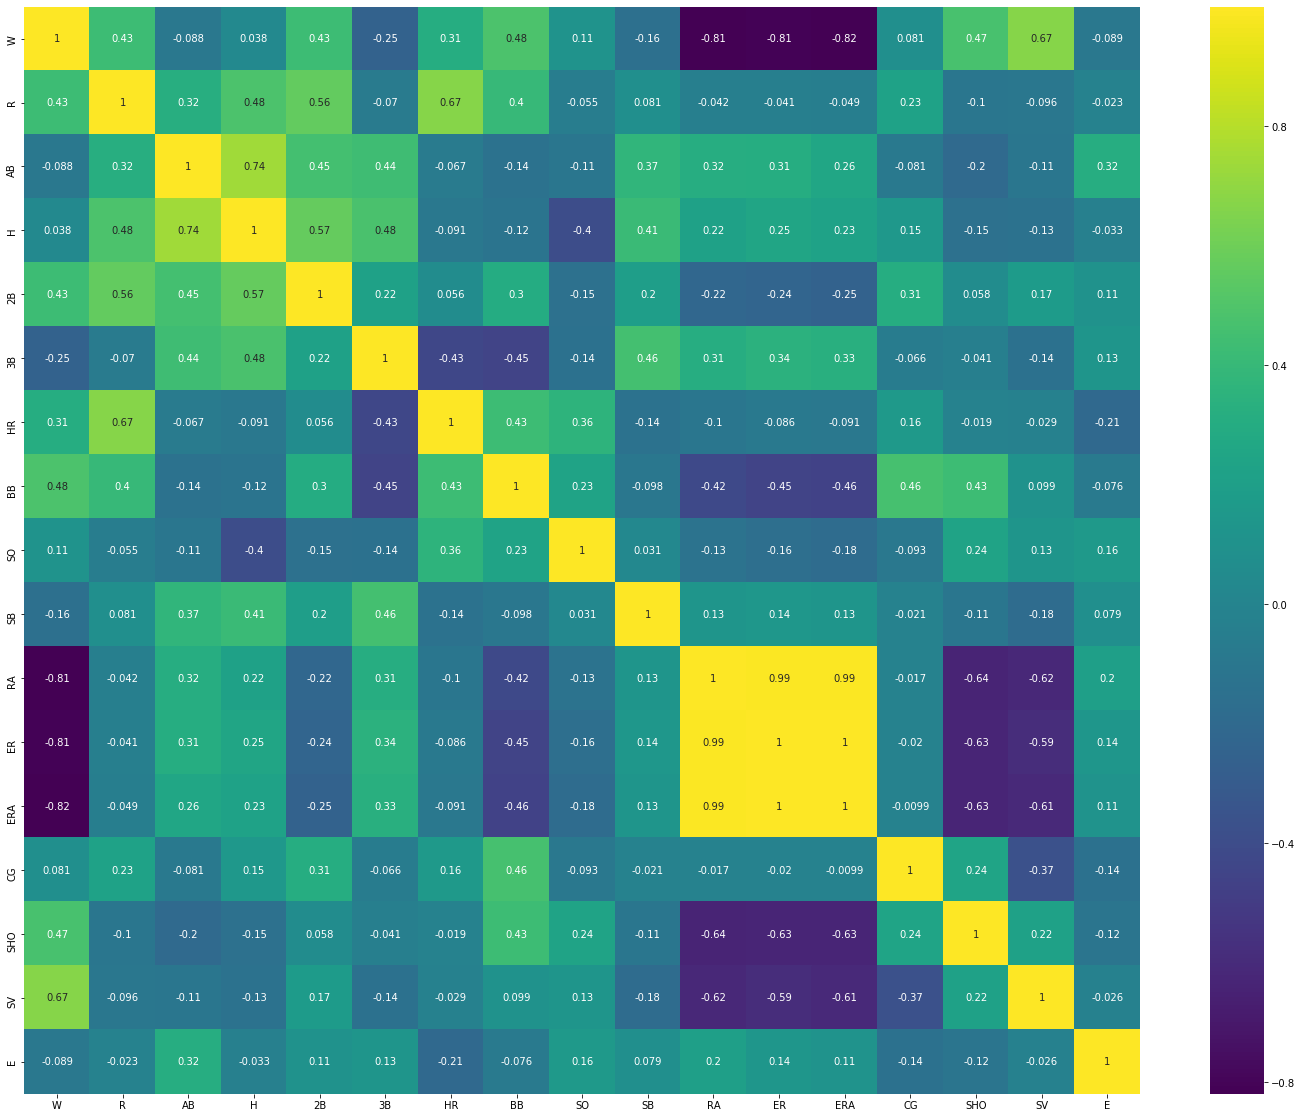

In [27]:
#Now let's check the correation with heatmap

data= df.corr()
plt.figure(figsize=(25,20))
ax=sns.heatmap(data, annot=True,cbar=True,cmap="viridis")
bottom, top=ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)

	2) From heat map
	ER and RA have 99 % correlation
	ERA and RA have 99  % correlation.
	H and AB have 77% correlation.
    ER and ERA hav 100%  correlation

In [28]:
#Let split the data for further preprocessing 
X=df.drop(['W'],axis=1)
y=df['W']

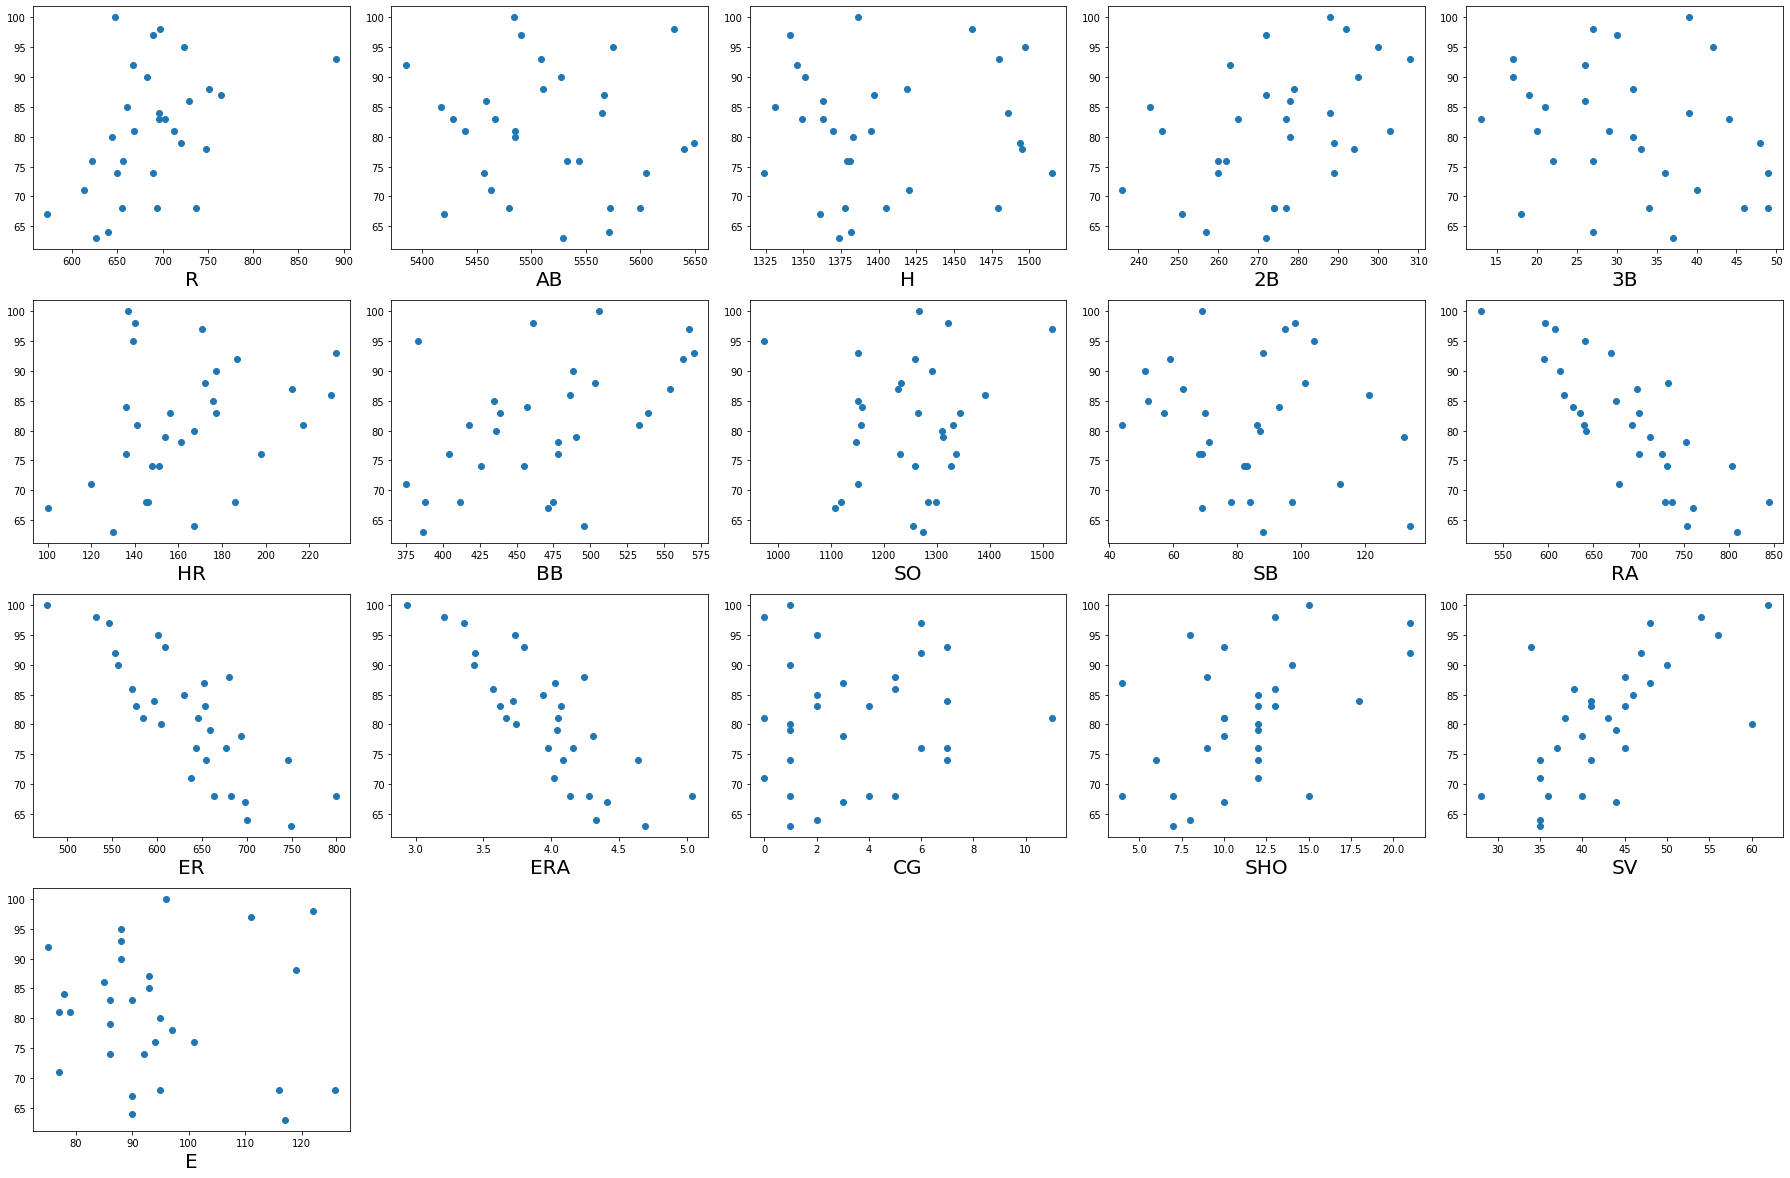

In [29]:
#Let's See scatter plot
plt.figure(figsize=(25,20))
plotnumber=1

for column in X:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [30]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

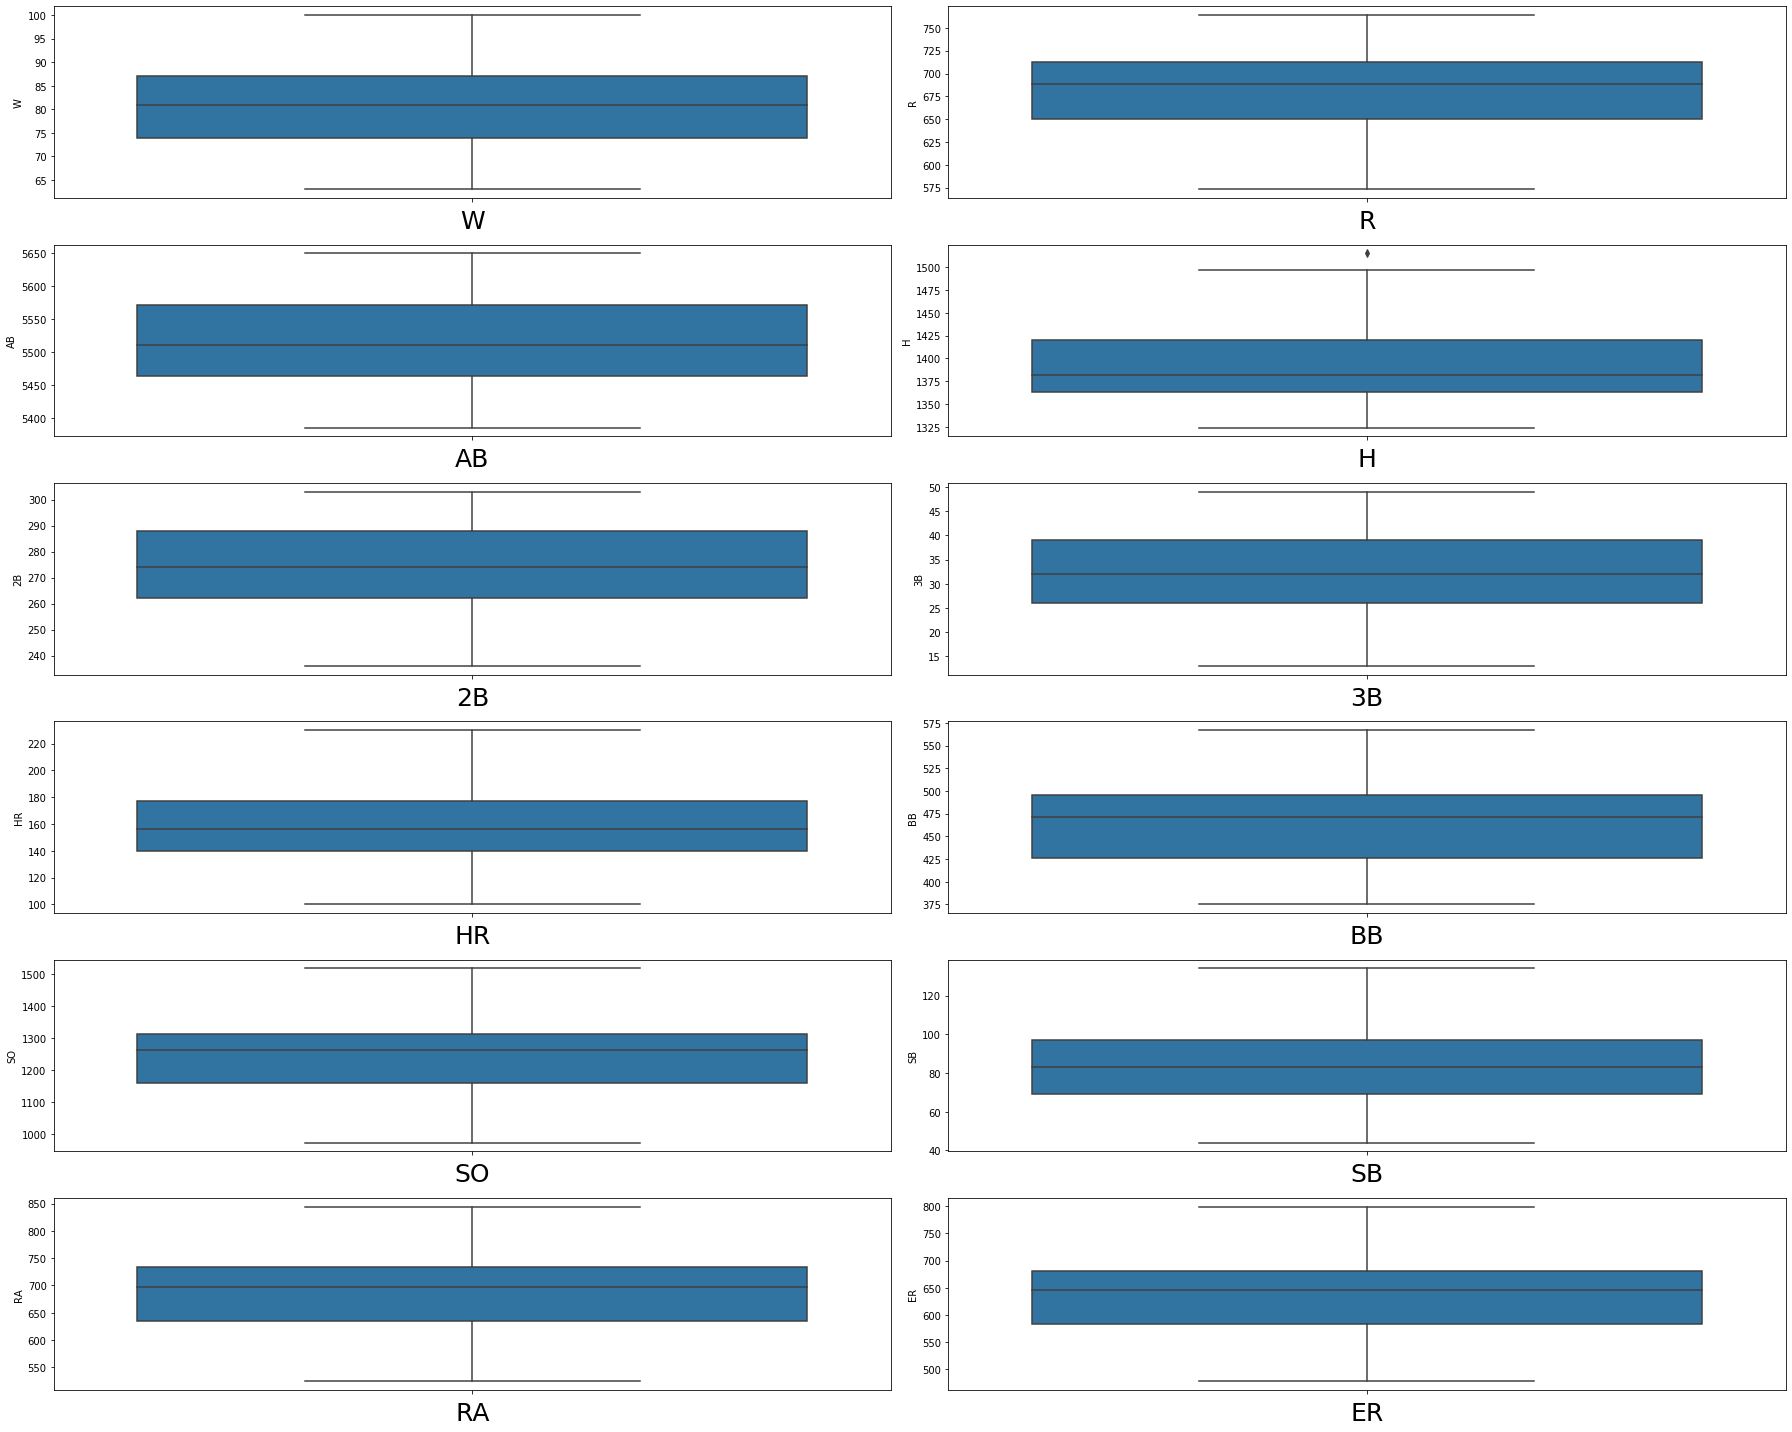

In [79]:
# Ploting the box plot to see outlier
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber <= 12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=25)
    plotnumber+=1

plt.tight_layout()

- data looks goods, unable to see any outlier.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled =scaler.fit_transform(X)

In [32]:
# There is possiblity of Multicollinearity  ,Hence conducting VIF test.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
#let's check the vif
vif

,vif,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [34]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_scaled,y,test_size=.25,random_state=0)

In [35]:
#Let plot the Dummumy model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
lr.score(X_test,y_test)

0.48297725174490025

In [ ]:
#dropping the Columns H ( as H and AB have 77% correlation.)There is possibility of Multicollinearity between them
#dropping the Columns RA ( 	2) From heat map
#	ER and RA have 99 % correlation
#ERA and RA have 99  % correlation.)
# by seeing the VIF score RA highly correlated to features ER and ERA

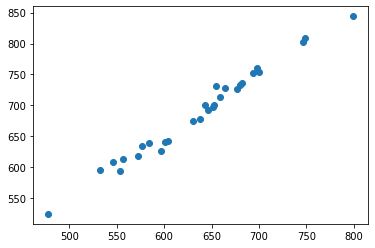

In [106]:
plt.scatter(x='ER',y='RA',data=df)

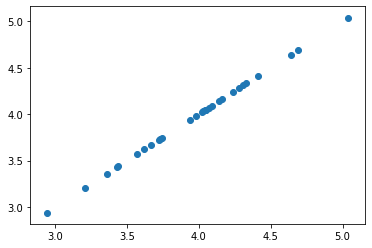

In [108]:

plt.scatter(x='ERA',y='ERA',data=df)

- from the above plot we can see there is a strong relationship b/w the features 99%

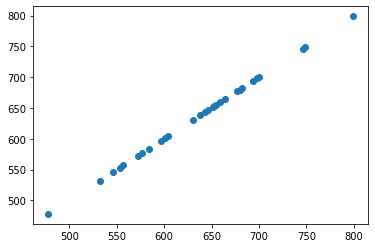

In [109]:

plt.scatter(x='ER',y='ER',data=df)

- from the above plot we can see there is a strong relationship b/w the features( ER and RA)

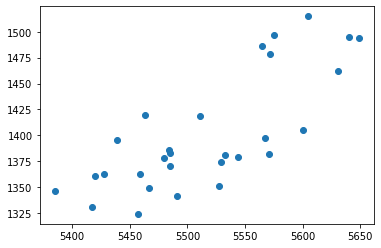

In [110]:

plt.scatter(x='AB',y='H',data=df)

- from the above plot we can see there is a  relationship b/w the features (H and AB of 77%)

In [36]:
#Let split the data for further preprocessing 
X=df.drop(['W','H','RA'],axis=1)
y=df['W']

In [37]:
#Split the data into independent and dependent 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled =scaler.fit_transform(X)

# variance_inflation_factor to see multicollinearity  

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
#let's check the vif
vif

,vif,Features
0,7.068618,R
1,7.149286,AB
2,3.778734,2B
3,3.062081,3B
4,6.050608,HR
5,3.168880,BB
6,2.204959,SO
7,1.558766,SB
8,956.343859,ER
9,958.801923,ERA


In [42]:
#dropping the Columns AB ( as R and AB have 77% correlation.)There is possibility of Multicollinearity between them.
#By als seeing the scatter plot for AB v/s label and R v/s label. R is more correlated to Label,Hence keeping R
#------------------------------------------------


##dropping the Columns ERA ( as ERA and ER have 100% correlation.)There is  Multicollinearity between them.
#By also seeing the scatter plot for ERA v/s label and ER v/s label. Both are equally  correlated to Label,Hence keeping ER

In [43]:
#Let split the data for further preprocessing 
X=df.drop(['W','H','RA','AB','ERA'],axis=1)
y=df['W']

In [44]:
#Normalize the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled =scaler.fit_transform(X)

In [45]:
#sliting the data set in 25 % testing and 75 % in training
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test)=train_test_split(X_scaled,y,test_size=.25,random_state=0)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns
#let's check the vif
vif

,vif,Features
0,6.158571,R
1,3.232053,2B
2,3.024647,3B
3,5.671273,HR
4,2.945501,BB
5,2.124759,SO
6,1.463796,SB
7,3.748259,ER
8,2.233401,CG
9,2.774531,SHO


- From above VIF plot number look normal.
- Anything above VIF >5 is consider case of Multicollinearity

# Model Building

In [50]:
#Create the loop  for differnt model
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0

for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_sc=r2_score(y_test,pre)
        print('R2 score correspond to random state',r_state, 'is',r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score=r2_sc
            final_state= r_state
            final_model =i
            
print()
print()
print()
print()
print("max r2 score correspond to random state",final_state, 'is',max_r2_score,'and model is ',final_model)

R2 score correspond to random state 40 is -0.5365631637503794
R2 score correspond to random state 40 is 0.3831414989379992
R2 score correspond to random state 40 is 0.4225562313999226
R2 score correspond to random state 40 is 0.6705455535994866
R2 score correspond to random state 40 is 0.02799272575169376
R2 score correspond to random state 41 is 0.5145530145530146
R2 score correspond to random state 41 is 0.4518503118503119
R2 score correspond to random state 41 is 0.5981462231462232
R2 score correspond to random state 41 is 0.5669699593689279
R2 score correspond to random state 41 is 0.49568645090151175
R2 score correspond to random state 42 is 0.4938947368421053
R2 score correspond to random state 42 is 0.68704
R2 score correspond to random state 42 is 0.6828194295261965
R2 score correspond to random state 42 is 0.8471454156105425
R2 score correspond to random state 42 is 0.635600092118594
R2 score correspond to random state 43 is -4.711549970077797
R2 score correspond to random sta

- max r2 score correspond to random state 48 is 0.9389131631213425 and model is  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
(X_train,X_test,y_train,y_test)=train_test_split(X_scaled,y,test_size=.25,random_state=48)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)

print("Linear Regression intercept -->",lr.intercept_)
print("Linear Regression cofficient -->",lr.coef_)
lr.score(X_test,y_test)

Linear Regression intercept --> 81.10788952635173
Linear Regression cofficient --> [ 8.02497388 -2.07212944 -0.55043602 -2.64294904 -1.4992342   0.7682337
 -0.14024482 -4.76510942  2.65436201  1.56484317  5.58016373 -0.1361929 ]


0.9389131631213425

In [53]:
# checking the Residual using MAE ,MSE,RMSE and R2

print("MSE",mean_squared_error(y_test,y_hat))

print("RMSE",mean_squared_error(y_test,y_hat)**0.5)

print("MAE",mean_absolute_error(y_test,y_hat))

print("R squared",r2_score(y_test,y_hat))

MSE 6.689008638212992
RMSE 2.5863117828701534
MAE 2.0862444197379055
R squared 0.9389131631213425


##Adjusted R2 statistics

 As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the     new independentvariables have any correlation with the output variable. In other words, even with the addition of new        features in our model, it is not necessary thatour model will yield better results but R2 value will increase. To rectify this  problem, we use Adjusted R2 value which penalises excessive use ofsuch features which do not correlate with the output data. 
 
 Let’s understand this with an example: 1-(1-R2)(N-1)/(N-p-1)
 We can see that R2 always increases with an increase in the number of independent variables.Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
 
 Mathematically, it is calculated as:
 
 1-(1-R2)(N-1)/(N-p-1)
 
 p->No of predictor
 N-->total sample size
 
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2. Thus, adjusted R2 will always be less than or equal to R2,and it penalises the excess of independent variables which do not affect the dependent variable.

# Calculating Adj R2

In [54]:
#Let's write the function for calculating the Adj R2

def adj_r2(y_test,y_hat,p):
    r2=r2_score(y_test,y_hat)
    n=len(y_test)
    return 1-(1-r2)(n-1)/(n-p-1)

In [88]:
ajd_r2(y_test,y_hat,X.shape[1])

1.0855215716301205

# Cross-Validation in sklearn

In [63]:
cross_val=cross_val_score(lr,X_train,y_train,cv=10,scoring='r2')
cross_val.mean()

-0.36981033202142755

Text(0, 0.5, 'Predicted')

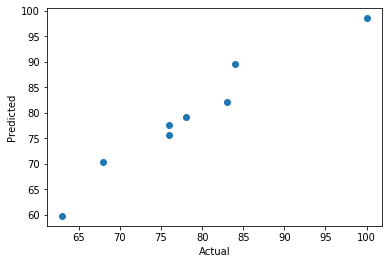

In [64]:
#checking the Actual and Predicted values using the scatter plot.
plt.scatter(x=y_test,y=y_hat)
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Using the Regularization technique 

In [93]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
# lassoCV will return best alpha after max iteration
lassocv=LassoCV(alphas=None,fit_intercept=True,max_iter=100,
    normalize=True,)
lassocv.fit(X_train,y_train)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=100, n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

# Lasso Regression

In [98]:
alpha=lassocv.alpha_
print("the best Alpha value is :",alpha)

the best Alpha value is : 0.17347754917540645


In [100]:
# now that we have best parameter, let's see  how the lasso regression fit the model.lass
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)
print("the accuracy of lasso regression is :",lasso_reg.score(X_test,y_test))

the accuracy of lasso regression is : 0.9541442105302366


- This indicate that our Linear Regression model is not overfitting ( 94%)
- the accuracy of lasso regression is : 0.9541442105302366 %
-Our model is not overfitting

# Ridge Regression

In [101]:
ridgecv=RidgeCV(alphas=np.arange(0.0001, 0.1,0.01),
    fit_intercept=True,
    normalize=True)
ridgecv.fit(X_train,y_train)


RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring=None, store_cv_values=False)

In [103]:
alpha=ridgecv.alpha_
print("the best Alpha value is :",alpha)

the best Alpha value is : 0.0901


In [104]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(X_train,y_train)
print("the accuracy of Ridge regression is :",ridge_reg.score(X_test,y_test))

the accuracy of Ridge regression is : 0.9427118802125449


- the accuracy of Ridge regression is : 0.94 %
- Our model is not overfitting

# Hyper Parameter Tuning

In [111]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

lasso_hp = GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'cyclic'}

In [115]:
#Through alpha value it will be corrected
le =Lasso(alpha=0.1,selection='cyclic')
le.fit(X_train,y_train)
predict = le.predict(X_test)
le.score(X_train,y_train)

print(r2_score(y_test,predict))

0.9551925232084405


In [117]:
#saving the final model
import pickle
with open( "modelfor prediction.sav",'wb') as f:
    pickle.dump(le,f)